In [1]:
import sys
import spotipy
import spotipy.util as util
import requests
from bs4 import BeautifulSoup
import numpy as np
import re
import random
import nltk
from nltk.corpus import stopwords
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import PIL.ImageOps
from wordcloud import ImageColorGenerator

In [2]:
# Assign artist and song name and path to image for word cloud
artist = "Fozzy"
song_name = "Judas"
imagefile = "images/jericho.png"

In [3]:
# Construct URL for web scraping
song_url = '{}-{}-lyrics'.format(str(artist).strip().replace(' ', '-'),
                                 str(song_name).strip().replace(' ', '-'))

print('\nSong: {}\nArtist: {}'.format(song_name, artist))


Song: Judas
Artist: Fozzy


In [4]:
# Assign request using song_url and obtain lyrics from genius.com
request = requests.get("https://genius.com/{}".format(song_url))

if request.status_code == 200:
    html_code = BeautifulSoup(request.text, features="html.parser")
    lyrics = html_code.find("div", {"class": "lyrics"}).get_text().strip()
    print(lyrics)
else:
    print("Song not found")

[Intro]
I'm becom-, I'm becom-, I'm becoming
I'm becom-, I'm becom-, I'm becoming

[Verse 1]
You are beautiful on the inside
You are innocence personified
And I will drag you down and sell you out
Run away
I am cold like December snow
I have carved out this soul made of stone
And I will drag you down and sell you out

[Pre-Chorus]
Embraced by the darkness, I'm losing the light
Encircled by demons, I fight

[Chorus]
What have I become? Now that I've betrayed
Everyone I've ever loved, I pushed them all away
And I have been a slave to the Judas in my mind
Is there something left of me to save
In the wreckage of my life? My life
I'm becom-, I'm becom-, I'm becoming
I'm becom-, I'm becom-, I'm becoming
Judas in, Judas in my mind
I'm becom-, I'm becom-, I'm becoming
I'm becom-, I'm becom-, I'm becoming
Judas in, Judas in my mind
Judas in my mind

[Verse 2]
Oh, this guilt is a heavy cross
There is blood on the path I walk
And each step I take is haunting me

[Pre-Chorus]
Embraced by the darkn

In [5]:
# Functions for cleaning up lyric text
def removebrackets(text):
    return re.sub('[\(\[].*?[\)\]]', ' ', text)

def remove_notes(text):
    return re.sub("[\(\[].*?[\)\]\}]", "", text)

def remove_special_chars(text, remove_digits=False):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    return re.sub(pattern, '', text)

def remove_stopwords(text):
    stopword_list = set(stopwords.words('english'))
    stopword_list.add("nt")
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    return ' '.join([token for token in tokens if token not in stopword_list])

In [6]:
# Function for color in word cloud
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

In [7]:
# Remove notes ([Intro], [Verse], [Chorus], etc.)
lyrics_new = remove_notes(lyrics)
# Remove special characters
lyrics_new = remove_special_chars(lyrics_new)
# Remove stopwords
lyrics_new = remove_stopwords(lyrics_new)

In [8]:
# Print lyrics words
lyrics_new

'Im becom Im becom Im becoming Im becom Im becom Im becoming You beautiful inside You innocence personified And I drag sell Run away I cold like December snow I carved soul made stone And I drag sell Embraced darkness Im losing light Encircled demons I fight What I become Now Ive betrayed Everyone Ive ever loved I pushed away And I slave Judas mind Is something left save In wreckage life My life Im becom Im becom Im becoming Im becom Im becom Im becoming Judas Judas mind Im becom Im becom Im becoming Im becom Im becom Im becoming Judas Judas mind Judas mind Oh guilt heavy cross There blood path I walk And step I take haunting Embraced darkness Im losing light Encircled demons I fight What I become Now Ive betrayed Everyone Ive ever loved I pushed away And I slave Judas mind Is something left save In wreckage life My life Im becom Im becom Im becoming Im becom Im becom Im becoming Judas Judas mind Im becom Im becom Im becoming Im becom Im becom Im becoming Judas Judas mind Judas mind Ju

Generating word cloud....
Making plot


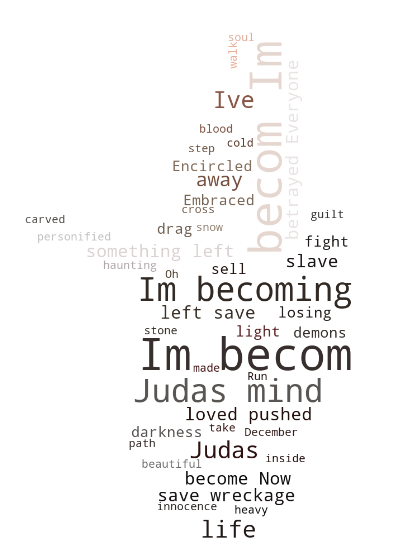

In [9]:
# Convert image into array
char_mask = np.array(Image.open(imagefile))
# Generate wordcloud on white background
print('Generating word cloud....')
wc = WordCloud(background_color="white", max_words=200, mask=char_mask, random_state=42)
wc.generate(lyrics_new)
print('Making plot')

image_colors = ImageColorGenerator(char_mask)
plt.figure(figsize=(20,10))
plt.style.use('classic')
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.savefig('wordcloud_white.png', dpi=200)
plt.show()


Generating word cloud....
Making plot


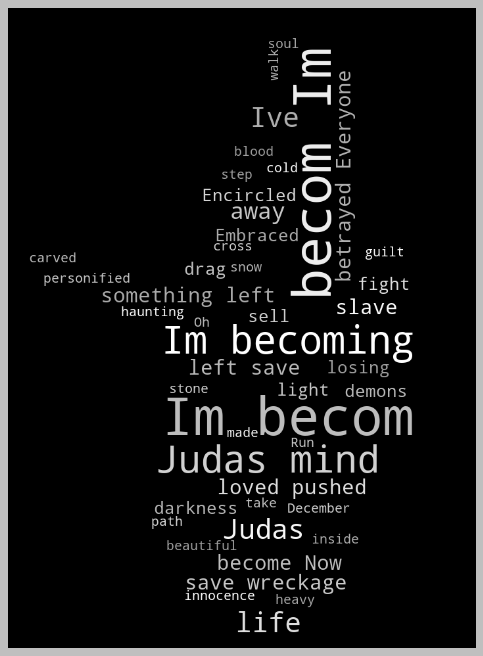

In [10]:
# Generate word cloud on black background
print('Generating word cloud....')
wc = WordCloud(background_color="black", max_words=200, mask=char_mask, random_state=42)
wc.generate(lyrics_new)
print('Making plot')

image_colors = ImageColorGenerator(char_mask)
plt.figure(figsize=(20,10))
plt.style.use('dark_background')
plt.imshow(wc.recolor(color_func=grey_color_func))
plt.axis("off")
plt.savefig('wordcloud_black.png', dpi=200)
plt.show()

In [11]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

In [12]:
d = word_count(lyrics_new)
import operator
sorted(d.items(), key=operator.itemgetter(1), reverse=True)

[('Im', 44),
 ('becom', 28),
 ('Judas', 19),
 ('I', 17),
 ('becoming', 14),
 ('mind', 13),
 ('And', 6),
 ('Ive', 6),
 ('life', 6),
 ('away', 4),
 ('What', 3),
 ('become', 3),
 ('Now', 3),
 ('betrayed', 3),
 ('Everyone', 3),
 ('ever', 3),
 ('loved', 3),
 ('pushed', 3),
 ('slave', 3),
 ('Is', 3),
 ('something', 3),
 ('left', 3),
 ('save', 3),
 ('In', 3),
 ('wreckage', 3),
 ('My', 3),
 ('You', 2),
 ('drag', 2),
 ('sell', 2),
 ('Embraced', 2),
 ('darkness', 2),
 ('losing', 2),
 ('light', 2),
 ('Encircled', 2),
 ('demons', 2),
 ('fight', 2),
 ('beautiful', 1),
 ('inside', 1),
 ('innocence', 1),
 ('personified', 1),
 ('Run', 1),
 ('cold', 1),
 ('like', 1),
 ('December', 1),
 ('snow', 1),
 ('carved', 1),
 ('soul', 1),
 ('made', 1),
 ('stone', 1),
 ('Oh', 1),
 ('guilt', 1),
 ('heavy', 1),
 ('cross', 1),
 ('There', 1),
 ('blood', 1),
 ('path', 1),
 ('walk', 1),
 ('step', 1),
 ('take', 1),
 ('haunting', 1)]